In [28]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
city='chicago'

In [ ]:
data=pd.read_csv(city+'_bnb.csv')
data.head(), data.info(), data.describe()

# Remove columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Convert price from string to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Print the cleaned data info to check changes
data.info()

In [ ]:
data.head(5)

In [45]:
# Group by host_id and count listings, sort by count
popular_hosts = data.groupby('host_id').size().sort_values(ascending=False).head(10)
popular_hosts

host_id
107434423    643
395498979     74
3965428       72
514776477     61
177188450     58
25138314      58
47172572      55
391945218     51
121719854     51
248760412     51
dtype: int64

/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/2290598411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/2290598411.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


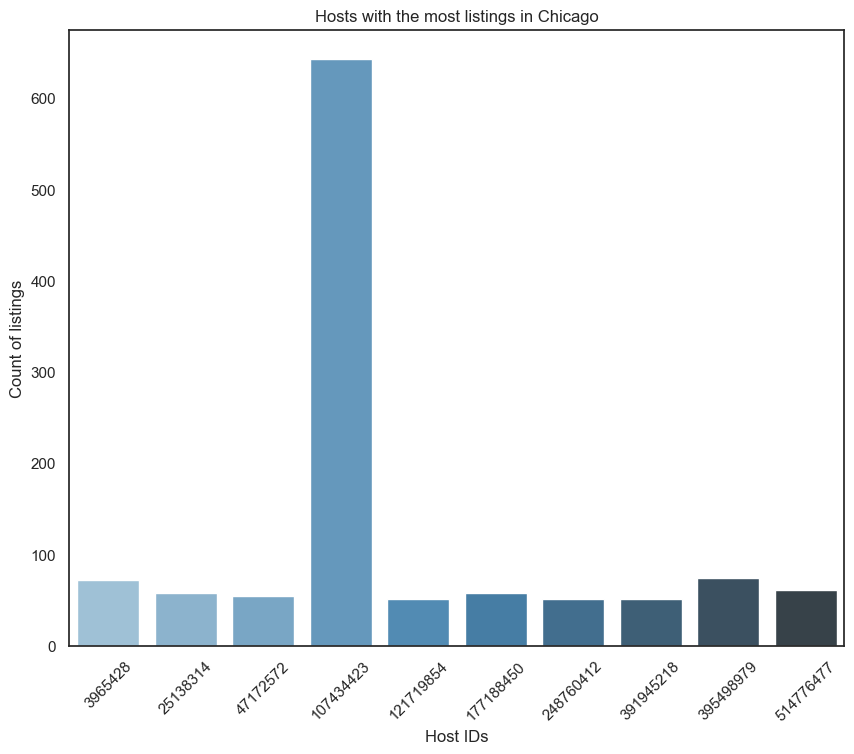

In [33]:
# Prepare data for visualization from earlier top hosts data
top_host_df = pd.DataFrame(popular_hosts).reset_index()
top_host_df.columns = ['Host_ID', 'P_Count']

# Set figure size and style for visualization
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

# Create bar plot to visualize top hosts with the most listings
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Chicago')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Show plot
plt.show()

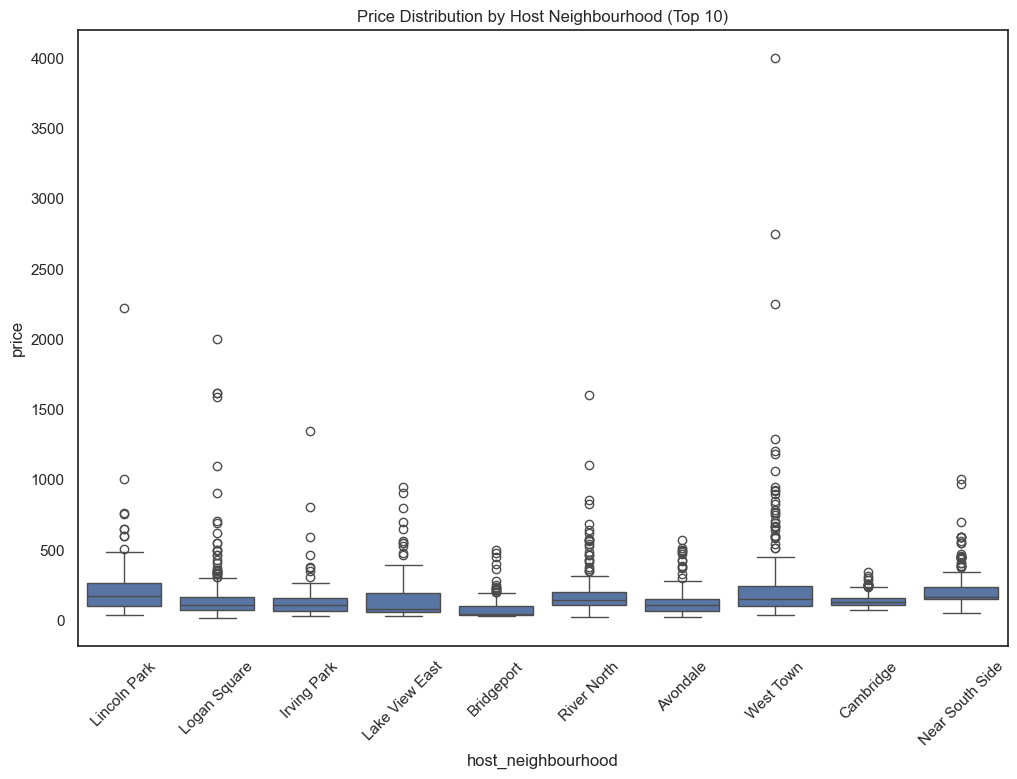

In [34]:
# Identify top 10 neighborhoods based on the number of listings
top_neighborhoods = data['host_neighbourhood'].value_counts().head(10).index

# Filter the data to include only listings from these top 10 neighborhoods
filtered_data = data[data['host_neighbourhood'].isin(top_neighborhoods)]

# Visualize the price distribution for the top 10 neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(x='host_neighbourhood', y='price', data=filtered_data)
plt.title('Price Distribution by Host Neighbourhood (Top 10)')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()


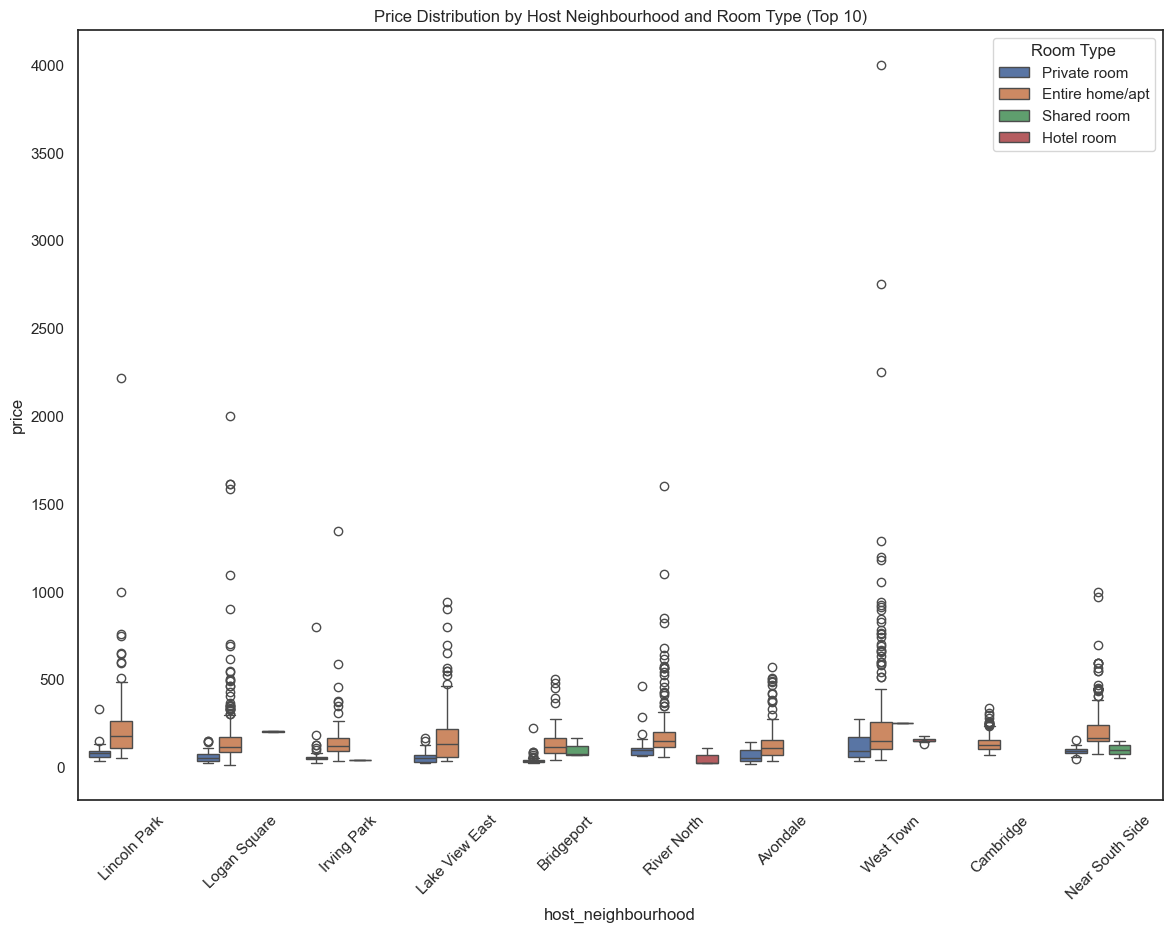

In [36]:
# Set figure size for better visualization
plt.figure(figsize=(14, 10))
sns.boxplot(x='host_neighbourhood', y='price', hue='room_type', data=filtered_data)
plt.title('Price Distribution by Host Neighbourhood and Room Type (Top 10)')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.legend(title='Room Type')
plt.show()


/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/bd/lyhf2lcs6bbfq6rcy7wkm3rw0000gn/T/ipykernel_23547/1782094538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

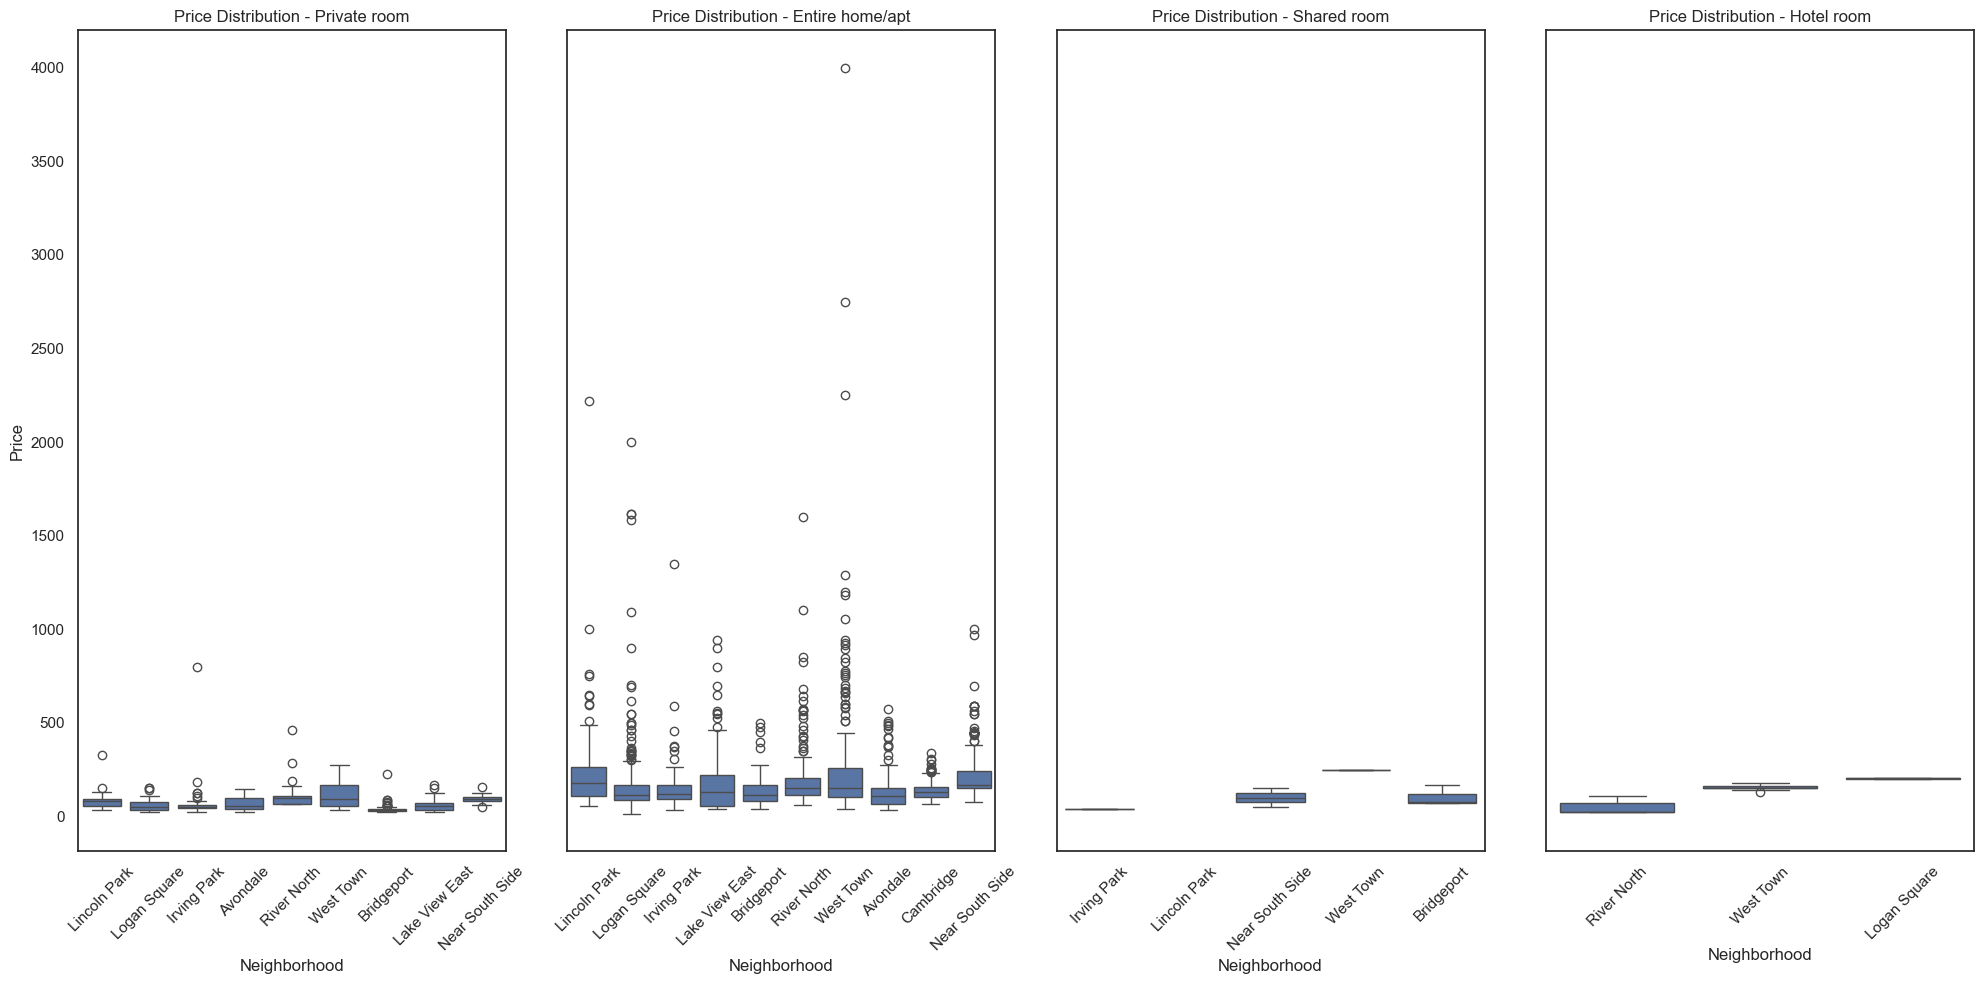

In [37]:
# Set up the figure for multiple subplots
room_types = filtered_data['room_type'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(room_types), figsize=(20, 10), sharey=True)

# Create a boxplot for each room type
for ax, room_type in zip(axes, room_types):
    subset = filtered_data[filtered_data['room_type'] == room_type]
    sns.boxplot(x='host_neighbourhood', y='price', data=subset, ax=ax)
    ax.set_title(f'Price Distribution - {room_type}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Neighborhood')
    ax.set_ylabel('Price')

# Adjust layout for better fit and display plot
plt.tight_layout()
plt.show()

In [53]:
import folium
from folium.plugins import HeatMap

# Create a basic map centered around Chicago
map_chicago = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Prepare data for the heatmap, removing NaN values
clean_data = data.dropna(subset=['latitude', 'longitude', 'price'])
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in clean_data.iterrows()]

# Add a heatmap layer
HeatMap(heat_data, radius=10, blur=10).add_to(map_chicago)

# Display the map
map_chicago
